In [1]:
import pandas as pd
import numpy as np
from tempfile import NamedTemporaryFile
from pylab import polyfit
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pathlib
import os

In [2]:
def hide_top_right(ax, xlabel, ylabel):
    ax.set_xlabel(xlabel, fontproperties=roboto)
    ax.set_ylabel(ylabel, fontproperties=roboto)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.title.set_position([.5, 1.05])

In [3]:
# Data from https://public.flourish.studio/visualisation/1921420/
path = pathlib.Path().absolute()
deaths_file = os.path.join(path, 'data', 'decesos.tsv')
deaths_data = pd.read_csv(deaths_file, sep='\t')
deaths_data

,Comuna,Población 2020,Muertes 2018,Muertes 2019,Muertes 2020,% Aumento Muertes 2019-2020,Tasa Mortalidad 2019 (x 100 mil),Tasa Mortalidad 2020 (x 100 mil),% Pobreza multidimensional (Casen 2017),Tasa incidencia acumulada casos Covid-19 (31-may)
0,Alhué,7405,1,2,2,0.00,27.72,27.01,20.3,94.5
1,Buin,109641,30,43,51,18.60,40.19,46.52,24.9,492.5
2,Calera de Tango,28525,9,11,12,9.09,39.41,42.07,22.1,326.0
3,Cerrillos,88956,29,39,50,28.21,44.31,56.21,27.4,1117.4
4,Cerro Navia,142465,99,76,154,102.63,53.75,108.10,34.6,1120.3
5,Colina,180353,41,32,75,134.38,18.48,41.59,25.5,804.5
6,Conchalí,139195,93,97,157,61.86,70.72,112.79,29.4,1444.0
7,Curacaví,36430,13,18,21,16.67,50.39,57.64,22.6,746.6
8,El Bosque,172000,99,106,146,37.74,61.81,84.88,22.7,961.6
9,El Monte,40014,14,21,29,38.10,53.44,72.47,33.7,379.9


In [4]:
comuna_nombre = 'Comuna'
aumento_muertes_nombre = '% Aumento Muertes 2019-2020'
pobreza_nombre = '% Pobreza multidimensional (Casen 2017)'
poblacion_nombre = 'Población 2020'
tasa_nombre = 'Tasa Mortalidad 2020 (x 100 mil)'
comuna = deaths_data[comuna_nombre]
aumento_muertes = deaths_data[aumento_muertes_nombre]
pobreza = deaths_data[pobreza_nombre]
poblacion = deaths_data[poblacion_nombre]
tasa = deaths_data[tasa_nombre]

# Normalize population to use them as circle radius
maxp = poblacion.max()
minp = poblacion.min()
maxsize = 1000.
m = (maxsize - 1.) / (maxp - minp)
n = (maxp - minp * maxsize) / (maxp - minp)
poblacion_normalizada = m * poblacion + n

# Define colors
cyan = np.array([0.2, 0.5, 0.6] * len(poblacion_normalizada)).reshape(-1,3)
blue = np.array([55.,126.,184.] * len(poblacion_normalizada)).reshape(-1,3) / 255.

In [5]:
# FONTS
roboto_url = 'https://github.com/google/roboto/blob/master/src/hinted/Roboto-Regular.ttf'
lato_url = 'https://github.com/google/fonts/blob/master/ofl/lato/Lato-Regular.ttf'
font_file = '?raw=true'
roboto_url = roboto_url + font_file  # You want the actual file, not some html
lato_url = lato_url + font_file

response = urlopen(roboto_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
roboto = fm.FontProperties(fname=f.name)

response = urlopen(lato_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
lato = fm.FontProperties(fname=f.name)

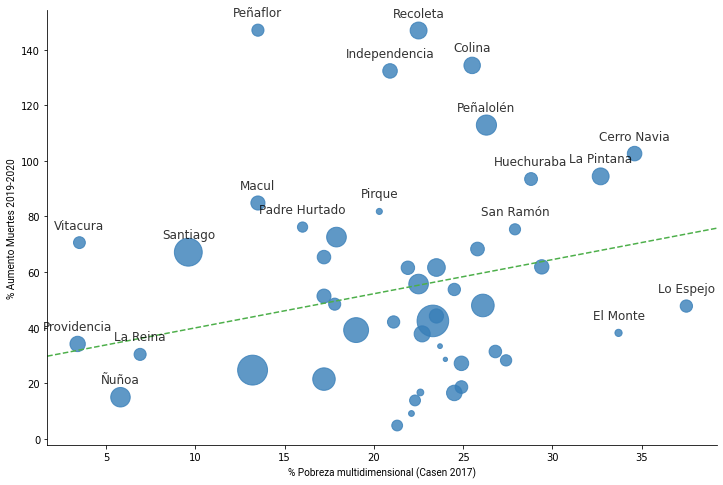

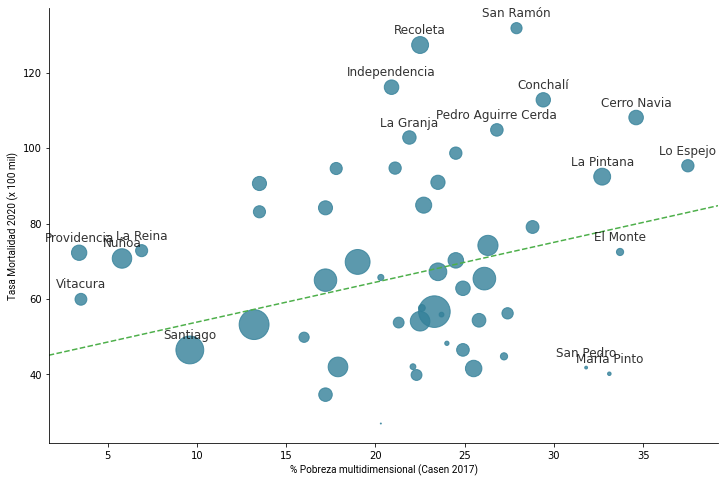

In [6]:
height = 8
width = 12
fig1, ax1 = plt.subplots(1, 1, figsize=(width, height))
fig2, ax2 = plt.subplots(1, 1, figsize=(width, height))

# Filter comunes with deaths > 0 not to distort plot
filtered = aumento_muertes > 0
indices = aumento_muertes.index[filtered]
ax1.scatter(pobreza[indices], aumento_muertes[indices], s=poblacion_normalizada[filtered], c=blue[filtered], alpha=0.8, edgecolors=blue)
# Normal and weighted linear fit
m,b = np.polyfit(pobreza[indices], aumento_muertes[indices], 1)
mw, bw = np.polyfit(pobreza[indices], aumento_muertes[indices], 1, w=poblacion_normalizada[filtered])
for idx in indices:
    if (pobreza[idx] > 30 or aumento_muertes[idx] > 75):
        ax1.text(pobreza[idx], aumento_muertes[idx]+5, comuna[idx], fontsize=12, ha='center', alpha=0.8)
    if (pobreza[idx] < 10):
        ax1.text(pobreza[idx], aumento_muertes[idx]+5, comuna[idx], fontsize=12, ha='center', alpha=0.8)
# Plot linear fit
xmin, xmax = ax1.set_xlim()
xs = np.array([xmin, xmax])
# ax1.plot(xs, m * xs + b, '--', color='#4daf4a')
ax1.plot(xs, mw * xs + bw, '--', color='#4daf4a')
        

ax2.scatter(pobreza, tasa, s=poblacion_normalizada, c=cyan, alpha=0.8, edgecolors=cyan)
for i,x in enumerate(comuna):
    if (pobreza[i] > 30 or tasa[i] > 100):
        ax2.text(pobreza[i], tasa[i]+3, x, fontsize=12, ha='center', alpha=0.8)
    if (pobreza[i] < 10):
        ax2.text(pobreza[i], tasa[i]+3, x, fontsize=12, ha='center', alpha=0.8)
# Normal and weighted linear fit
m,b = np.polyfit(pobreza, tasa, 1)
mw,bw = np.polyfit(pobreza, tasa, 1, w=poblacion_normalizada)
# Plot linear fit
xmin, xmax = ax2.set_xlim()
xs = np.array([xmin, xmax])
# ax2.plot(xs, m * xs + b, '--', color='#4daf4a')
ax2.plot(xs, mw * xs + bw, '--', color='#4daf4a')

hide_top_right(ax1, pobreza_nombre, aumento_muertes_nombre)
hide_top_right(ax2, pobreza_nombre, tasa_nombre)

# fig1.savefig(fig_path + 'aumento_muertes_vs_pobreza.png', dpi=200)
# fig2.savefig(fig_path + 'tasa_mortalidad_vs_pobreza.png', dpi=200)